In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic 
import copy, time

In [2]:
cities = {'Vienna': (48.20817, 16.37382), 
          'Zurich' : (46.987536362460084, 7.427499610340133),
          'Rome': (41.86933058455828, 12.662484881620202),
          'Prague': (50.07589292509622, 14.435404050834023),
          'Amsterdam': (52.509346514796945, 5.323617705412682), 
          'Madrid': (40.727924387874644, -3.781408384468865),
          'Sofia': (43.01009091777951, 23.23397235157129)
}

In [3]:
def find_distances(cities):
    distance_dict = {}

    for i, city in enumerate(cities):
        geo1 = cities[city]
        dist_dict_city = {}
        for j, dest in enumerate(cities):
            geo2 = cities[dest]
            if city != dest :
                dist_dict_city[dest] = geodesic(geo1, geo2).kilometers
        distance_dict[city] = dist_dict_city
    return distance_dict

In [4]:
distance_dict_cities = find_distances(cities)

In [5]:
distance_dict_cities["Vienna"]

{'Zurich': 685.9223993023388,
 'Rome': 762.4968207466433,
 'Prague': 251.2740196021872,
 'Amsterdam': 918.9905100755412,
 'Madrid': 1798.8381038998227,
 'Sofia': 786.8688371108004}

In [6]:
def brute_force_method(node, cities_dist, path, total_dist, routes_list):
    path.append(node)

    if len(path) > 1:
        total_dist += cities_dist[path[-2]][path[-1]]

    if all(x in path for x in  list(cities_dist.keys())):
        path.append(path[0])
        total_dist += cities_dist[path[-2]][path[0]]
        routes_list.append([total_dist, path])
        pass

    for city in cities_dist:
        if (city not in path):
            brute_force_method(city, dict(cities_dist), list(path), total_dist, routes_list)
    return(routes_list)

In [7]:
r = brute_force_method('Vienna', distance_dict_cities, [], 0, [])
r.sort()
brute_force = r[0]
brute_force

[5756.658506030546,
 ['Vienna',
  'Sofia',
  'Rome',
  'Madrid',
  'Zurich',
  'Amsterdam',
  'Prague',
  'Vienna']]

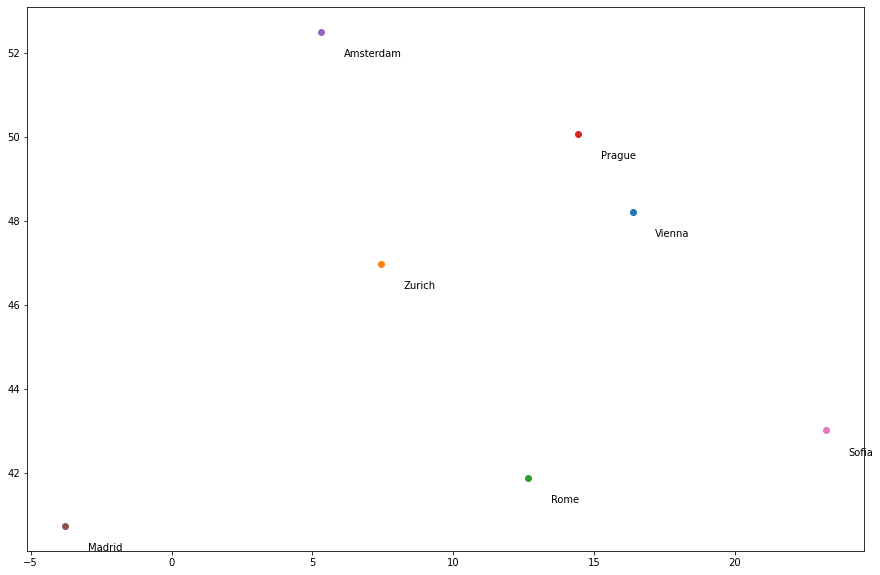

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))

for i in cities:
    plt.scatter(cities[i][1], cities[i][0], label = i)
    ax.annotate(i, (cities[i][1], cities[i][0]), xytext=(cities[i][1]+0.8, cities[i][0]-0.6))
# plt.legend()
plt.show()

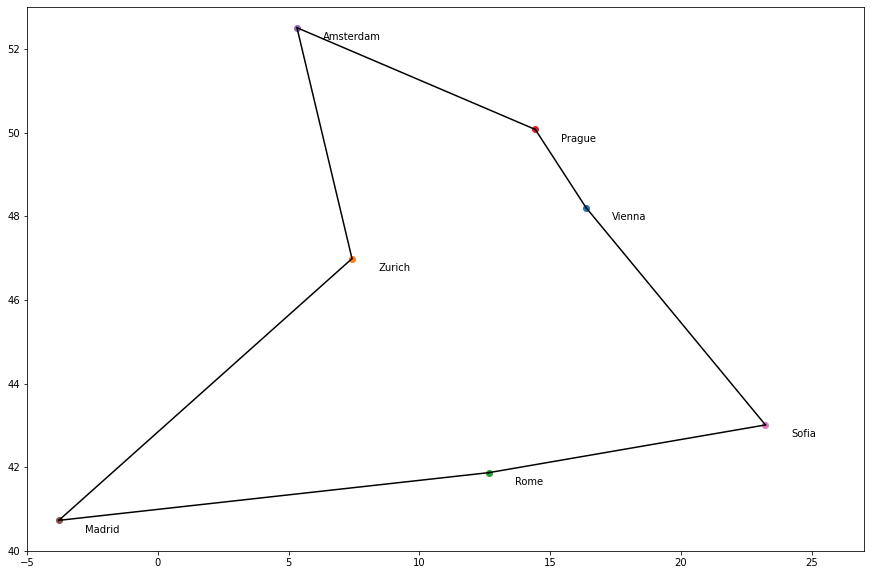

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))

for i in cities:
    plt.scatter(cities[i][1], cities[i][0], label = i)
    ax.annotate(i, (cities[i][1], cities[i][0]), xytext=(cities[i][1]+1, cities[i][0]-0.3))
    
for j in range(0, (len(brute_force[1])-1)):
    plt.plot((cities[brute_force[1][j]][1], cities[brute_force[1][j+1]][1]), (cities[brute_force[1][j]][0], cities[brute_force[1][j+1]][0]), color="black")
# plt.legend()
plt.xlim([-5, 27])
plt.ylim([40, 53])
plt.show()

In [10]:
def nearest_neighbour(node, dist_cities):
    path = [node]
    total_dist = 0
    c = copy.deepcopy(dist_cities)

    # usuwam ze słownika wszystkie wartości, któe już były wczesniej w trasie
    for i in range(0, (len(dist_cities)-1)):
        for x in path[:-1]: del c[path[-1]][x]   #c[path[-1]][x]   
        total_dist = total_dist + min(c[path[-1]].values())
        path.append(min(c[path[-1]], key = c[path[-1]].get))
        
    path.append(path[0])
    total_dist = total_dist + dist_cities[path[-1]][path[-2]]
    return([path, total_dist])

In [11]:
queue, distance_km = nearest_neighbour("Vienna", distance_dict_cities)

In [12]:
print(queue, "\n", distance_km)

['Vienna', 'Prague', 'Zurich', 'Amsterdam', 'Rome', 'Sofia', 'Madrid', 'Vienna'] 
 7734.564514677886


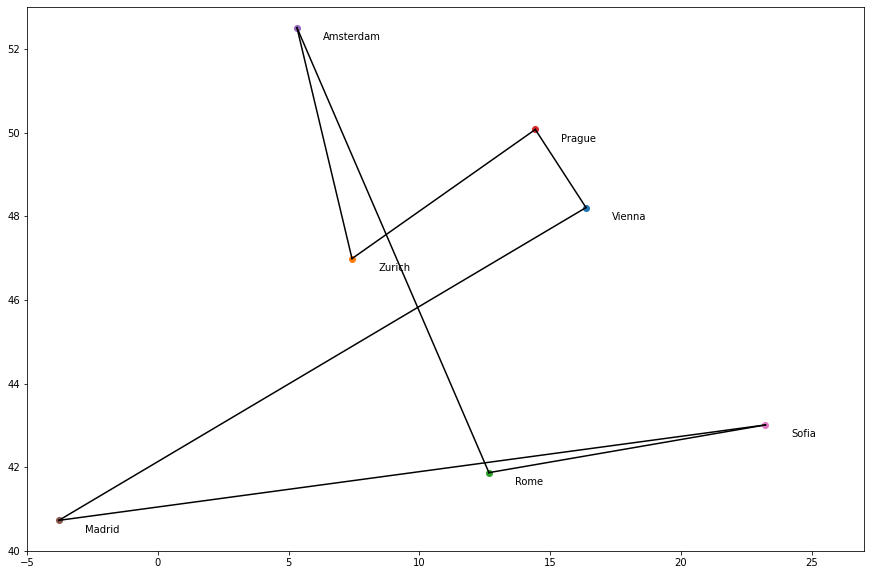

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

for i in cities:
    plt.scatter(cities[i][1], cities[i][0], label = i)
    ax.annotate(i, (cities[i][1], cities[i][0]), xytext=(cities[i][1]+1, cities[i][0]-0.3))
    
for j in range(0, (len(queue)-1)):
    plt.plot((cities[queue[j]][1], cities[queue[j+1]][1]) , (cities[queue[j]][0], cities[queue[j+1]][0]), color="black")
# plt.legend()
plt.xlim([-5, 27])
plt.ylim([40, 53])
plt.show()

# Najbliższy sąsiad, zaczynanie algorytmu od każdego węzła

In [14]:
possible_routes = []
total_dist = []

In [16]:
for i in cities.keys():
    trip, dist = nearest_neighbour(i, distance_dict_cities)
    possible_routes.append(trip)
    total_dist.append(dist)

In [17]:
min(total_dist)

6830.773183529856

In [18]:
index = total_dist.index(min(total_dist))
rnn = possible_routes[index]
print(rnn)

['Zurich', 'Prague', 'Vienna', 'Rome', 'Sofia', 'Amsterdam', 'Madrid', 'Zurich']


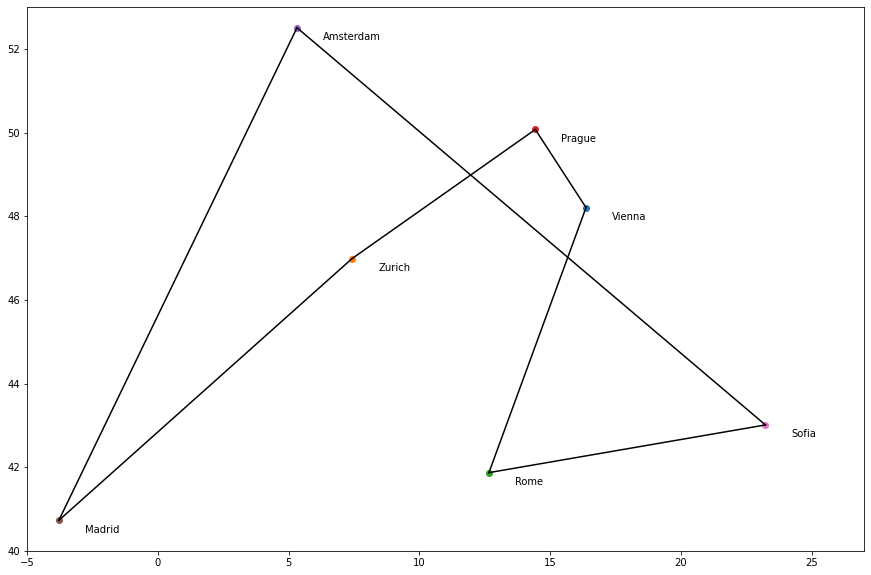

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))

for i in cities:
    plt.scatter(cities[i][1], cities[i][0], label = i)
    ax.annotate(i, (cities[i][1], cities[i][0]), xytext=(cities[i][1]+1, cities[i][0]-0.3))
    
for j in range(0, (len(queue)-1)):
    plt.plot((cities[rnn[j]][1], cities[rnn[j+1]][1]) , (cities[rnn[j]][0], cities[rnn[j+1]][0]), color="black")
# plt.legend()
plt.xlim([-5, 27])
plt.ylim([40, 53])
plt.show()

# Losowe położenie i trochę więcej miast

In [20]:
def random_cities(n):
    cities = {}

    for i in range(n):
        cities[str(i)] = tuple(np.random.uniform(0,50, 2))
    return(cities)

In [62]:
# sprawdzanie czasu dla RNN

In [96]:
amount = [50, 100, 300, 500]
# amount = [5, 10, 50]
r_cities = [random_cities(n) for n in amount]
distance = [find_distances(r) for r in r_cities]

In [97]:
t = []

for i in range(0, len(amount)):
    start = time.time()
    for x in range(amount[i]):
#         print(i,x)
        queue, distance_km = nearest_neighbour(list(r_cities[i].keys())[x], distance[i])
    end = time.time()
    t.append(end-start)


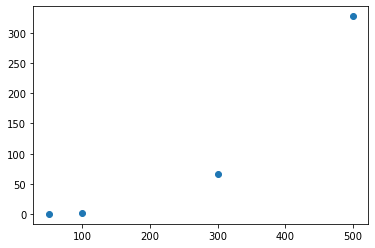

In [98]:
plt.scatter(amount, t)

In [ ]:
# czasy dla NN

In [22]:
amount_nn = [50, 100, 300, 500]
# amount = [5, 10, 50]
r_cities_nn = [random_cities(n) for n in amount_nn]
distance_nn = [find_distances(r) for r in r_cities_nn]

In [23]:
t_nn = []

for i in range(0, len(amount_nn)):
    start = time.time()
    queue, distance_km = nearest_neighbour('0', distance_nn[i])
    end = time.time()
    t_nn.append(end-start)


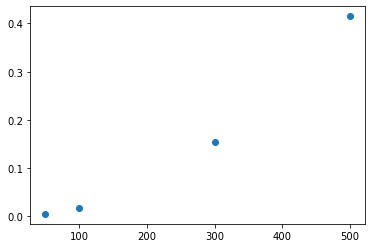

In [24]:
plt.scatter(amount_nn, t_nn)

In [29]:
amount_bf = [x for x in range(5,12)]
# amount = [5, 10, 50]
r_cities_bf = [random_cities(n) for n in amount_bf]
distance_bf = [find_distances(r) for r in r_cities_bf]

In [30]:
t_bf = []

for i in range(0, len(amount_bf)):
    start = time.time()
    queue = brute_force_method('0', distance_bf[i], [], 0, [])
    end = time.time()
    t_bf.append(end-start)
    print(i)

0
1
2
3
4
5
6


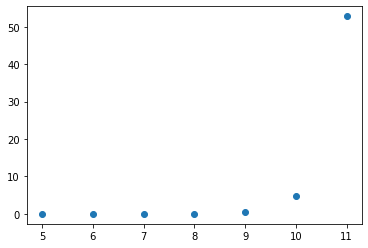

In [31]:
plt.scatter(amount_bf, t_bf)